In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
fmnist = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels) , (test_images,test_labels) = fmnist.load_data()

In [5]:
np.shape(train_images[0])

(28, 28)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

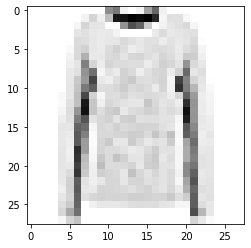

In [8]:
plt.imshow(train_images[840],cmap='Greys')

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4957 - accuracy: 0.8325s - - ETA: 1s - loss: 0.4961 - accura - ETA
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4825 - accuracy: 0.8341s - loss: 0.4809 
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4752 - accuracy: 0.8374
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4726 - accuracy: 0.8353
Epoch 5/5
60000/60000 [==============================] - ETA: 0s - loss: 0.4677 - accuracy: 0.83 - 4s 64us/sample - loss: 0.4680 - accuracy: 0.8378


In [22]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7741915386199951, 0.8405]

In [23]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

In [26]:
callbacks = myCallback()
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=50, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4107 - accuracy: 0.8669
Epoch 2/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4060 - accuracy: 0.8669
Epoch 3/50
59616/60000 [============================>.] - ETA: 0s - loss: 0.3998 - accuracy: 0.8682
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3999 - accuracy: 0.8680


In [27]:
mnist = keras.datasets.mnist

In [28]:
(train_number,train_numlabels) , (test_number,test_numlabels) = mnist.load_data()

In [29]:
np.shape(train_number)

(60000, 28, 28)

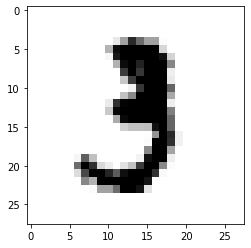

In [33]:
plt.imshow(train_number[10],cmap='Greys')